# Names
This project looks at the popularity of names up until 2015, showing naming trends through history. After exploring some of the features of pandas, I begin to ask questions about specific names, just out of curiosity. 

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

Have a look at the file to see the data format

In [2]:
file_path='C:\\Users\\Claudia\\Documents\\Data_Sci_Study\\Projects\\Names\\yob2015.txt'
open(file_path,'r').readlines()[:5]

['Emma,F,20435\n',
 'Olivia,F,19669\n',
 'Sophia,F,17402\n',
 'Ava,F,16361\n',
 'Isabella,F,15594\n']

Load into dataframe

In [3]:
names2015 = pd.read_csv(file_path, names = ['Name', 'Gender', 'Num_Babies'])
names2015.head()

,Name,Gender,Num_Babies
0,Emma,F,20435
1,Olivia,F,19669
2,Sophia,F,17402
3,Ava,F,16361
4,Isabella,F,15594


Read all years into a single array then concatenate into single dataframe

In [4]:
all_years = []
loop_file_path = file_path[:-8]

for year in range(1880, 2015 + 1):  # we have data files from 1880 to 2015
    all_years.append(pd.read_csv(loop_file_path + '{}.txt'.format(year),
                                names = ['Name', 'Gender', 'Num_Babies']))
    all_years[-1]['Year'] = year
    
all_names = pd.concat(all_years)
all_names.tail()

,Name,Gender,Num_Babies,Year
33093,Zykell,M,5,2015
33094,Zyking,M,5,2015
33095,Zykir,M,5,2015
33096,Zyrus,M,5,2015
33097,Zyus,M,5,2015


Groupby will segment the data into meaningful groups. For example, here we look at the number of Female & Male Names by Year

In [5]:
group_name = all_names.groupby(['Gender', 'Year'])
group_name.size().unstack()

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Gender,,,,,,,,,,,,,,,,,,,,,
F,942,938,1028,1054,1172,1197,1282,1306,1474,1479,...,20050,20560,20457,20179,19811,19560,19498,19231,19181,19074
M,1058,997,1099,1030,1125,1097,1110,1067,1177,1111,...,14032,14390,14613,14523,14256,14343,14234,14038,14047,14024


The gives a sum of all the babies born in 2015 (by using our first dataset created just from 2015 data), but only for babies with names used at least 5 times. The table above counts only names, one count per name. The numbers below will count babies, not names. 

In [6]:
names2015.groupby(['Gender']).sum()

,Num_Babies
Gender,
F,1778883
M,1909804


Pivot tables summarize data (sort, count, total, average). The pd.pivot_table() function needs the name of the dataframe, the data field to be grouped, and a field for each dimension that it will be grouped by. 

In [7]:
pd.pivot_table(all_names, 'Num_Babies', 'Name', 'Year')

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Name,,,,,,,,,,,,,,,,,,,,,
Aaban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0
Aabha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0
Aabid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0
Aada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Aadam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,8.0,6.0,9.0,7.0,17.0,11.0,16.0,19.0,22.0
Aadan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,22.0,23.0,11.0,11.0,11.0,13.0,8.0,10.0
Aadarsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,13.0,16.0,NaN,7.0,12.0,12.0,18.0,15.0
Aaden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,157.0,956.0,636.0,450.0,275.0,224.0,203.0,238.0,297.0


The many missing values is to be expected based on the great increase we saw earlier in the number of names used over the years (from around 1,000 per gender in 1880 to over 14,000 in 2015).<br>
It is possible to have two fields in a column rather than one as columns and one as rows:

In [8]:
pd.pivot_table(all_names, 'Num_Babies', ['Name', 'Year'])

Num_Babies
Name      Year            
Aaban     2007         5.0
          2009         6.0
          2010         9.0
          2011        11.0
          2012        11.0
          2013        14.0
          2014        16.0
          2015        15.0
Aabha     2011         7.0
          2012         5.0
          2014         9.0
          2015         7.0
Aabid     2003         5.0
Aabriella 2008         5.0
          2014         5.0
          2015         5.0
Aada      2015         5.0
Aadam     1987         5.0
          1988         5.0
          1993         7.0
          1994         6.0
          1995         6.0
          1996         5.0
          1997         5.0
          1998         8.0
          1999         5.0
          2000         6.0
          2002        11.0
          2003        10.0
          2004         9.0
...                    ...
Zyshawn   2011         5.0
          2012        10.0
          2013        13.0
          2014         6.0
Zyshon    1998         8.0
          2001         6.0
          2005         5.0
Zyshonne  1998        26.0
          1999        30.0
          2000        17.0
          2001        12.0
          2002         9.0
          2003         7.0
Zytaevius 2012         5.0
Zytaveon  2011         8.0
          2014         8.0
Zytavion  2011         5.0
Zytavious 2002         6.0
          2004         6.0
          2005         5.0
          2006         7.0
          2007         6.0
          2009         7.0
          2010         6.0
Zyus      2015         5.0
Zyvion    2009         5.0
Zyvon     2015         7.0
Zyyanna   2010         6.0
Zyyon     2014         6.0
Zzyzx     2010         5.0

[1695988 rows x 1 columns]

To see the changing popularity of a given name, indexes need to be set and sorted. In pandas, data can be manipulated in multiple dimensions.

In [9]:
all_names_index = all_names.set_index(['Gender', 'Name', 'Year']).sort_index()

In [10]:
all_names_index

Num_Babies
Gender Name      Year            
F      Aabha     2011           7
                 2012           5
                 2014           9
                 2015           7
       Aabriella 2008           5
                 2014           5
                 2015           5
       Aada      2015           5
       Aaden     2009           5
       Aadhira   2012           6
                 2013          10
                 2014          13
                 2015           8
       Aadhya    2007          10
                 2008           9
                 2009          18
                 2010          19
                 2011          52
                 2012         110
                 2013         172
                 2014         249
                 2015         265
       Aadi      2006           5
                 2012           5
                 2013           6
       Aadison   2009           6
                 2012           5
       Aaditri   2010           5
                 2012           5
                 2013           6
...                           ...
M      Zyshawn   2010           9
                 2011           5
                 2012          10
                 2013          13
                 2014           6
       Zyshon    1998           8
                 2001           6
                 2005           5
       Zyshonne  1998          26
                 1999          30
                 2000          17
                 2001          12
                 2002           9
                 2003           7
       Zytaevius 2012           5
       Zytaveon  2011           8
                 2014           8
       Zytavion  2011           5
       Zytavious 2002           6
                 2004           6
                 2005           5
                 2006           7
                 2007           6
                 2009           7
                 2010           6
       Zyus      2015           5
       Zyvion    2009           5
       Zyvon     2015           7
       Zyyon     2014           6
       Zzyzx     2010           5

[1859217 rows x 1 columns]

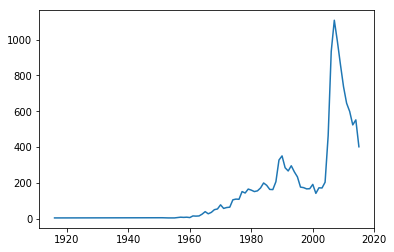

In [11]:
def name_plot(gender, name):
    ''' plot the popularity of a name over time '''
    data = all_names_index.loc[gender, name] #gather data for this gender/name
    pp.plot(data.index, data.values) #plot gender/name data against index (year)

name_plot('F', 'Danica')


Look at trends over time across different names.

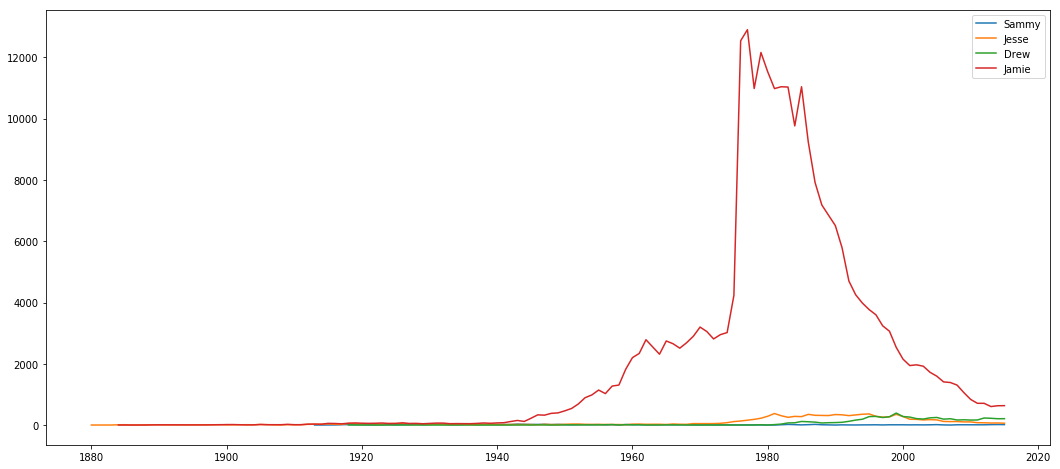

In [12]:
pp.figure(figsize = (18, 8)) # make the plot a bit bigger
names = ['Sammy', 'Jesse', 'Drew', 'Jamie']
for name in names: 
    name_plot('F', name) # try first as female name
    
pp.legend(names)  # add a legend


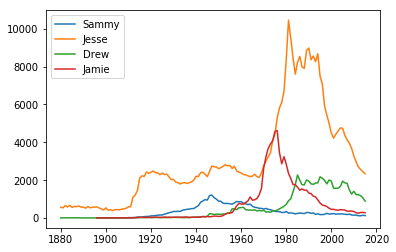

In [13]:
for name in names: 
    name_plot('M', name) # now try as male name
    
pp.legend(names)  # add a legend

Are the babies named "Adolf" after 1945 born to neo-nazis?

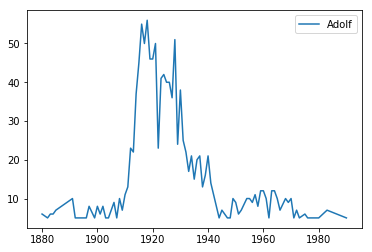

In [14]:
name_plot('M', 'Adolf') 
pp.legend(['Adolf'])

Madonna went solo as a pop singer and became famous in 1981. This chart shows a spike in babies named "Madonna" soon after.

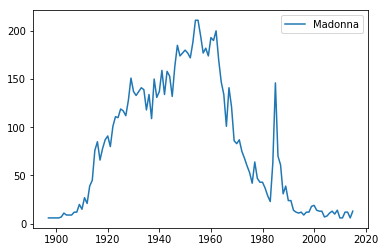

In [15]:
name_plot('F', 'Madonna')
pp.legend(['Madonna'])

In [31]:
#data = all_names[all_names.Name.str.startswith('A')]

all_names[all_names.Name.str.startswith('A')].to_csv('NamesExport.csv', sep=',')

#### Next Steps
- group similar names that have alternative spelling
- find a better graph format that indicates volume more visually than a line graph
